### Import all neccesary packages

In [17]:
from matplotlib import pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

from tensorflow.keras.models import Sequential, save_model

### Model configuration

In [2]:
img_width, img_height = 28, 28
batch_size = 250
no_epochs = 25
no_classes = 10
validation_split = 0.2
verbosity = 1

### Load MNIST dataset

In [3]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

### Data Preview

In [10]:
print(f"train_input_shape = {input_train.shape}, train_output_shape = {target_train.shape}")

train_input_shape = (60000, 28, 28), train_output_shape = (60000,)


In [11]:
print(f"test_input_shape = {input_test.shape}, test_output_shape = {target_test.shape}")

test_input_shape = (10000, 28, 28), test_output_shape = (10000,)


train_data at id = 0, label = 5


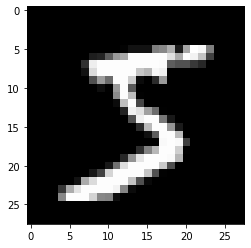

In [12]:
idx = 0
print(f"train_data at id = {idx}, label = {target_train[idx]}")

plt.imshow(input_train[0], cmap="gray")
plt.show()

### set up channel

In [13]:
# Reshape data based on channels first / channels last strategy.
# This is dependent on whether you use TF, Theano or CNTK as backend.
# Source: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
if K.image_data_format() == 'channels_first':
    input_train = input_train.reshape(input_train.shape[0], 1, img_width, img_height)
    input_test = input_test.reshape(input_test.shape[0], 1, img_width, img_height)
    input_shape = (1, img_width, img_height)
    
else:
    input_train = input_train.reshape(input_train.shape[0], img_width, img_height, 1)
    input_test = input_test.reshape(input_test.shape[0], img_width, img_height, 1)
    input_shape = (img_width, img_height, 1)

### cast to floats

In [14]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

### convert to gray scale

In [15]:
# Convert them into black or white: [0, 1].
input_train = input_train / 255
input_test = input_test / 255

### Convert labels to categorical vectors

In [18]:
# Convert target vectors to categorical targets
target_train = keras.utils.to_categorical(target_train, no_classes)
target_test = keras.utils.to_categorical(target_test, no_classes)

### Create the Model

In [19]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

### Compile the Model

In [20]:
# Compile the model
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

### Fit the Model

In [21]:
# Fit data to model
model.fit(
    input_train, 
    target_train,
    batch_size=batch_size,
    epochs=no_epochs,
    verbose=verbosity,
    validation_split=validation_split
)

Epoch 1/25
192/192 [==============================] - 39s 202ms/step - loss: 0.3671 - accuracy: 0.8882 - val_loss: 0.0980 - val_accuracy: 0.9716
Epoch 2/25
192/192 [==============================] - 40s 210ms/step - loss: 0.0955 - accuracy: 0.9716 - val_loss: 0.0568 - val_accuracy: 0.9839
Epoch 3/25
192/192 [==============================] - 47s 246ms/step - loss: 0.0684 - accuracy: 0.9786 - val_loss: 0.0503 - val_accuracy: 0.9856
Epoch 4/25
192/192 [==============================] - 52s 272ms/step - loss: 0.0529 - accuracy: 0.9832 - val_loss: 0.0442 - val_accuracy: 0.9865
Epoch 5/25
192/192 [==============================] - 52s 271ms/step - loss: 0.0458 - accuracy: 0.9861 - val_loss: 0.0375 - val_accuracy: 0.9889
Epoch 6/25
192/192 [==============================] - 54s 279ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0341 - val_accuracy: 0.9898
Epoch 7/25
192/192 [==============================] - 55s 285ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0347 - val_ac

### Evaluate Model

In [22]:
# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.026689007878303528 / Test accuracy: 0.9926999807357788


### Save Model

In [23]:
# Save the model
filepath = './MNIST_classifier'
save_model(model, filepath)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./MNIST_classifier\assets
